# **CAH effect**

In [18]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster,dendrogram
import numpy as np


# Define points
points = [
    (2,2),    # P1
    (7.5,4),   # P2
    (3, 3),    # P3
    (0.5,5),    # P4
    (6,4)  # P5
]

In [19]:
# Euclidean distance function
def distance(p1, p2):
    return math.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)

# Create initial distance matrix
def create_distance_matrix(points):
    n = len(points)
    matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            dist = distance(points[i], points[j])
            matrix[i][j] = matrix[j][i] = round(dist, 2)
    return matrix

# CAH clustering with min/max distance option
def cah_clustering(points, use_min_distance=True):
    # Initial setup
    clusters = [[p] for p in points]
    labels = [f'P{i+1}' for i in range(len(points))]
    distance_matrix = create_distance_matrix(points)

    # Display the initial distance matrix
    print("\nInitial Distance Matrix:")
    for i, row in enumerate(distance_matrix):
        print(f"P{i+1} ", " ".join(f"{x:6.2f}" for x in row))

    # Intermediate tables to store
    intermediate_tables = []
    merge_count = 1  # Start merge count for labeling

    while len(clusters) > 1:
        # Find minimum or maximum distance
        target_dist = float('inf') if use_min_distance else float('-inf')
        target_indices = None
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                # Calculate distance between clusters
                if use_min_distance:
                    cluster_dist = min(distance(p1, p2) for p1 in clusters[i] for p2 in clusters[j])
                else:
                    cluster_dist = max(distance(p1, p2) for p1 in clusters[i] for p2 in clusters[j])

                if (use_min_distance and cluster_dist < target_dist) or (not use_min_distance and cluster_dist > target_dist):
                    target_dist = cluster_dist
                    target_indices = (i, j)

        # Merge closest or farthest clusters
        i, j = target_indices
        merged_cluster = clusters[i] + clusters[j]

        # Update clusters and labels
        new_clusters = []
        new_labels = []
        for k, cluster in enumerate(clusters):
            if k == i:
                new_clusters.append(merged_cluster)
                new_labels.append(f'A{merge_count}')
            elif k != j:
                new_clusters.append(cluster)
                new_labels.append(labels[k])

        clusters = new_clusters
        labels = new_labels
        merge_count += 1  # Increment merge count

        # Create and store intermediate distance matrix using the farthest neighbor criterion
        inter_matrix = np.zeros((len(clusters), len(clusters)))
        for r in range(len(clusters)):
            for c in range(r+1, len(clusters)):
                if r == i or c == i:  # If one of the clusters is the newly formed cluster
                    dist = max(distance(p1, p2) for p1 in clusters[r] for p2 in clusters[c])
                else:
                    dist = min(distance(p1, p2) for p1 in clusters[r] for p2 in clusters[c]) if use_min_distance else max(distance(p1, p2) for p1 in clusters[r] for p2 in clusters[c])
                inter_matrix[r][c] = inter_matrix[c][r] = round(dist, 2)

        intermediate_tables.append({
            'distance_matrix': inter_matrix
        })

    return intermediate_tables

# Run CAH with min distance
intermediate_steps = cah_clustering(points, use_min_distance=True)################################ USE MAX
print("\nUsing Minimum Distance:")
for i, step in enumerate(intermediate_steps, 1):
    print(f"\nStep {i} Distance Matrix:")
    for j, row in enumerate(step['distance_matrix']):
        print(" ".join(f"{x:6.2f}" for x in row))

# Run CAH with max distance
intermediate_steps_max = cah_clustering(points, use_min_distance=False)
print("\nUsing Maximum Distance:")
for i, step in enumerate(intermediate_steps_max, 1):
    print(f"\nStep {i} Distance Matrix:")
    for j, row in enumerate(step['distance_matrix']):
        print(" ".join(f"{x:6.2f}" for x in row))




Initial Distance Matrix:
P1    0.00   5.85   1.41   3.35   4.47
P2    5.85   0.00   4.61   7.07   1.50
P3    1.41   4.61   0.00   3.20   3.16
P4    3.35   7.07   3.20   0.00   5.59
P5    4.47   1.50   3.16   5.59   0.00

Using Minimum Distance:

Step 1 Distance Matrix:
  0.00   5.85   3.35   4.47
  5.85   0.00   7.07   1.50
  3.35   7.07   0.00   5.59
  4.47   1.50   5.59   0.00

Step 2 Distance Matrix:
  0.00   5.85   3.20
  5.85   0.00   7.07
  3.20   7.07   0.00

Step 3 Distance Matrix:
  0.00   7.07
  7.07   0.00

Step 4 Distance Matrix:
  0.00

Initial Distance Matrix:
P1    0.00   5.85   1.41   3.35   4.47
P2    5.85   0.00   4.61   7.07   1.50
P3    1.41   4.61   0.00   3.20   3.16
P4    3.35   7.07   3.20   0.00   5.59
P5    4.47   1.50   3.16   5.59   0.00

Using Maximum Distance:

Step 1 Distance Matrix:
  0.00   5.85   1.41   4.47
  5.85   0.00   4.61   5.59
  1.41   4.61   0.00   3.16
  4.47   5.59   3.16   0.00

Step 2 Distance Matrix:
  0.00   4.61   5.59
  4.61   0.00  

# **Dendrogramme**

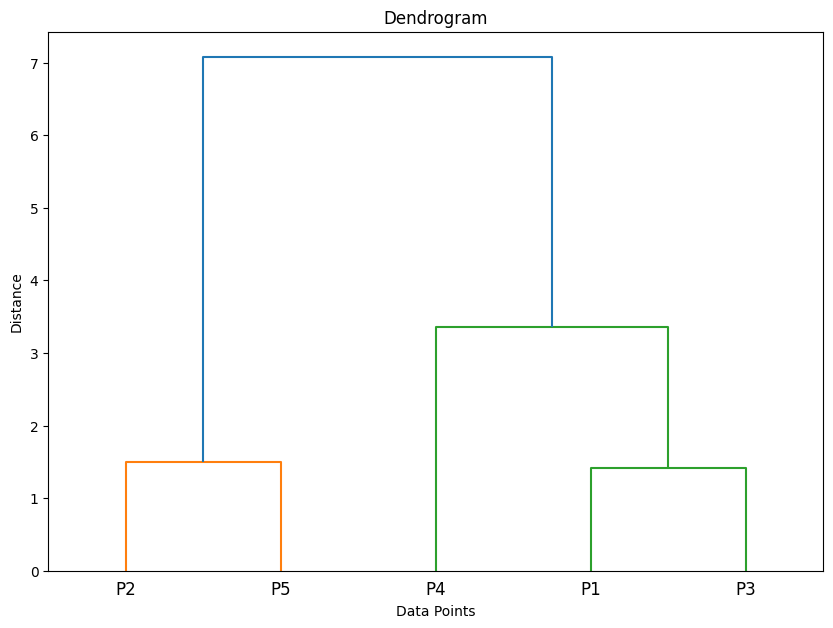

In [20]:
# Convert points to numpy array
points_array = np.array(points)

# Assuming 'points_array' is your NumPy array of data points
Z = linkage(points_array, method='complete')
# You can use other methods like 'single', 'average', 'ward' etc.

plt.figure(figsize=(10, 7))  # Set figure size (optional)
dendrogram(Z, labels=['P1', 'P2', 'P3', 'P4', 'P5'], orientation='top')
# 'labels' should correspond to your data points
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# **Tableau des distances ultramétriques**

In [21]:
#Tableau des distances ultramétriques

def create_ultrametric_distance_matrix(Z, points):
    n = len(points)
    ultrametric = np.zeros((n, n))

    # Keep track of which points are in which cluster at each level
    cluster_membership = np.arange(n)

    # Process each merging step from Z
    for i, (c1, c2, dist, _) in enumerate(Z):
        c1, c2 = int(c1), int(c2)

        # Find all points in each cluster
        mask1 = cluster_membership == c1
        mask2 = cluster_membership == c2

        # Update the cluster membership for merged clusters
        new_cluster_id = n + i
        cluster_membership[mask1 | mask2] = new_cluster_id

        # Update distances between all points in the different clusters
        for p1 in range(n):
            for p2 in range(n):
                if ((cluster_membership[p1] == c1 and cluster_membership[p2] == c2) or
                    (cluster_membership[p1] == c2 and cluster_membership[p2] == c1)):
                    ultrametric[p1][p2] = dist
                    ultrametric[p2][p1] = dist
                elif ultrametric[p1][p2] == 0 and p1 != p2:
                    # For points that were previously in the same cluster
                    if cluster_membership[p1] == cluster_membership[p2]:
                        ultrametric[p1][p2] = dist
                        ultrametric[p2][p1] = dist

    return ultrametric

# Calculate the linkage matrix Z using complete linkage (maximum distance)
Z = linkage(points_array, method='complete')

# Create and print the ultrametric matrix
ultrametric_matrix = create_ultrametric_distance_matrix(Z, points)
print("\nUltrametric Distance Matrix:")
print("     ", end="")
for i in range(len(points)):
    print(f"P{i+1:2d}   ", end="")
print()
for i in range(len(points)):
    print(f"P{i+1:2d}", end="  ")
    for j in range(len(points)):
        print(f"{ultrametric_matrix[i][j]:5.2f}", end=" ")
    print()


Ultrametric Distance Matrix:
     P 1   P 2   P 3   P 4   P 5   
P 1   0.00  7.07  1.41  3.35  7.07 
P 2   7.07  0.00  7.07  7.07  1.50 
P 3   1.41  7.07  0.00  3.35  7.07 
P 4   3.35  7.07  3.35  0.00  7.07 
P 5   7.07  1.50  7.07  7.07  0.00 


# **find largest jump**

In [22]:
def find_best_partitions(Z):
    # Get the heights from Z
    heights = Z[:, 2]
    heights = sorted(heights)

    # Calculate jumps between consecutive heights
    jumps = np.diff(heights)

    print("\nAnalysis of heights and jumps:")
    for i in range(len(jumps)):
        print(f"Between height {heights[i]:.2f} and {heights[i+1]:.2f}: jump = {jumps[i]:.2f}")

    # Find significant jumps (largest differences)
    significant_jumps_idx = np.argsort(jumps)[::-1]  # Sort in descending order

    print("\nBest partitions based on largest jumps:")
    for idx in significant_jumps_idx[:2]:  # Look at top 2 largest jumps
        height = heights[idx]
        jump = jumps[idx]
        print(f"\nAt height {height:.2f} (jump: {jump:.2f}):")

        # Determine the number of clusters at this height
        num_clusters = len(Z) + 1 - (idx + 1)  # Total clusters minus the index of the jump
        print(f"Number of clusters: {num_clusters}")

        # Print the partitions based on the height
        labels = fcluster(Z, height, criterion='distance')
        clusters = {}

        for i in range(1, num_clusters + 1):
            clusters[f'A{i}'] = [f'P{j+1}' for j in range(len(points)) if labels[j] == i]

        for cluster_name, members in clusters.items():
            print(f"{cluster_name} = {members}")

# After creating the linkage matrix Z, call the function
Z = linkage(points_array, method='complete')
find_best_partitions(Z)


Analysis of heights and jumps:
Between height 1.41 and 1.50: jump = 0.09
Between height 1.50 and 3.35: jump = 1.85
Between height 3.35 and 7.07: jump = 3.72

Best partitions based on largest jumps:

At height 3.35 (jump: 3.72):
Number of clusters: 2
A1 = ['P2', 'P5']
A2 = ['P1', 'P3', 'P4']

At height 1.50 (jump: 1.85):
Number of clusters: 3
A1 = ['P2', 'P5']
A2 = ['P1', 'P3']
A3 = ['P4']
